In [ ]:
!pip install names


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803681 sha256=986daaf577f2a1c6ac6758890ce3594e8417d2ec2b7dce44f4fd850a3523dc90
  Stored in directory: /root/.cache/pip/wheels/8d/db/fc/50ec19a89a8dcbbd158a4aae44123cb525cda1f07dae287197
Successfully built names


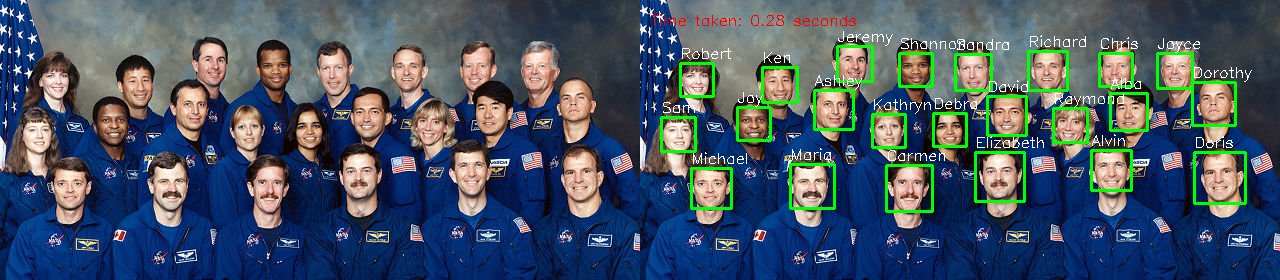

In [ ]:
import cv2
import time
import numpy as np
import names
#from google.colab.patches import cv2_imshow  # ✅ This is the Colab-safe image display

# Load image
image_path = "/content/groupface.jpg"
img = cv2.imread(image_path)
original = img.copy()

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start timer
start = time.time()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 5)

# Generate a unique name for each face
used_names = set()
def get_unique_name():
    while True:
        name = names.get_first_name()
        if name not in used_names:
            used_names.add(name)
            return name

# Annotate each detected face
for (x, y, w, h) in faces:
    name = get_unique_name()
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Smaller font size and thickness
    cv2.putText(img, name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

# Time taken
end = time.time()
elapsed = round(end - start, 2)
cv2.putText(img, f"Time taken: {elapsed} seconds", (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

# Combine original and annotated image side-by-side
combined = np.hstack((original, img))

# ✅ Show the result in Colab
cv2_imshow(combined)

# Optional: Save output image
# cv2.imwrite("faces_with_random_names.png", combined)
